In [1]:
import plotly.plotly as py
from plotly.graph_objs import *
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
from scipy.stats import norm
import plotly.figure_factory as ff
import math
from scipy.stats import skewnorm
import datetime as dt

In [2]:
length= 172800

x = np.random.normal(0,1,length)
y = np.random.normal(0,1,length)
z = np.random.normal(0,1,length) + 9.81

t = [dt.datetime.today().replace(microsecond=0) - dt.timedelta(microseconds=i*100) for i in range(length)]


In [6]:
df = pd.DataFrame.from_dict({'Time': t[::-1],
                             'X': x,
                             'Y': y,
                             'Z': z
                            })

now = dt.datetime.now()
sec = now.second
minute = now.minute
hour = now.hour
microsec = now.microsecond

totalTime = ((hour * 3600) + (minute * 60) + (sec)) *1000 + (microsec)
df
totalTime

50033203

In [13]:
import sqlite3
from datetime import *
connex = sqlite3.connect("acceleration-data.db")  # Opens file if exists, else creates file
cursor = connex.cursor()

cursor.execute("DROP TABLE IF EXISTS acceleration")
df.to_sql(name='acceleration', con=connex)


In [14]:
con = sqlite3.connect("acceleration-data.db")
df = pd.read_sql_query("SELECT * from acceleration where rowid > "+ str(totalTime-200) + " AND rowid < " + str(totalTime) + ";" , con)
df


,index,Time,X,Y,Z
0,49177,2019-04-16 13:42:44.637800,0.278007,-0.929228,8.536828
1,49178,2019-04-16 13:42:44.637900,0.496951,0.410792,11.518282
2,49179,2019-04-16 13:42:44.638000,0.916984,0.881017,10.581513
3,49180,2019-04-16 13:42:44.638100,-0.525333,0.299092,10.256913
4,49181,2019-04-16 13:42:44.638200,-0.142568,0.814192,11.836767
5,49182,2019-04-16 13:42:44.638300,-2.159256,-0.286376,9.100665
6,49183,2019-04-16 13:42:44.638400,0.348245,0.596785,10.158762
7,49184,2019-04-16 13:42:44.638500,-0.090022,0.284911,9.845485
8,49185,2019-04-16 13:42:44.638600,-1.316328,-0.416926,7.944869
9,49186,2019-04-16 13:42:44.638700,-0.942443,0.719837,9.806898


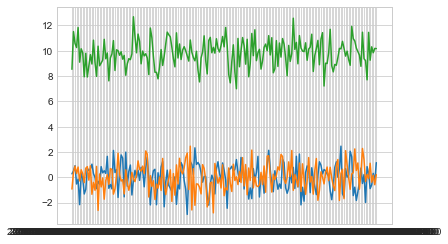

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()


ax.plot(df["Time"], df["X"])
ax.plot(df["Time"], df["Y"])
ax.plot(df["Time"], df["Z"])